In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('music_spotify.csv', index_col=0)

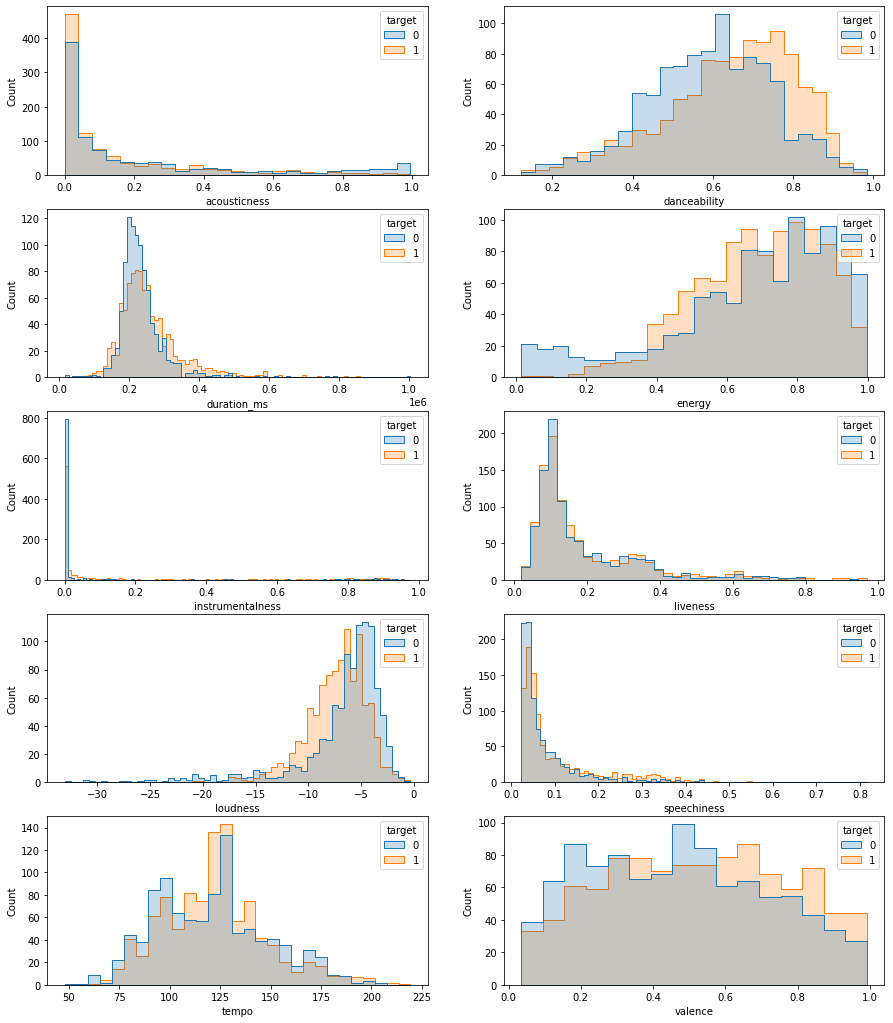

In [3]:
names = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
fig, axs = plt.subplots(5, 2)
axs = np.ravel(axs)

for i in range(len(names)):
    sns.histplot(df, x=names[i], hue="target", element="step", ax=axs[i])
    
ax = np.reshape(axs, (5, 2))
fig.set_figheight(18)
fig.set_figwidth(15)

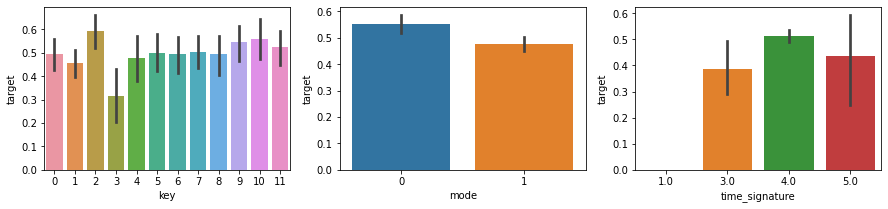

In [4]:
fig, axs = plt.subplots(1, 3)
axs = np.ravel(axs)
sns.barplot(y=df['target'], x=df['key'], ax=axs[0])
sns.barplot(y=df['target'], x=df['mode'], ax=axs[1])
sns.barplot(y=df['target'], x=df['time_signature'], ax=axs[2])

ax = np.reshape(axs, (1, 3))
fig.set_figheight(3)
fig.set_figwidth(15)

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(['target', 'song_title', 'artist'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

In [6]:
# import the metrics class
from sklearn import metrics

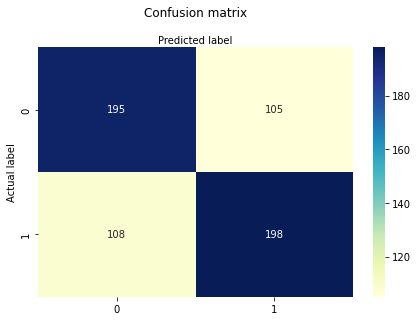

0.6485148514851485


In [20]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(random_state=123, solver='liblinear', penalty='l1')

# fit the model with data
logreg.fit(X_train, y_train)
y_prob = logreg.predict_proba(X_test)
y_pred = logreg.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0, 1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print(accuracy_score(y_test, y_pred))

In [21]:
y_prob = [x[1] for x in y_prob]

In [22]:
fs = []
thres = np.arange(0.5, 0.54, 0.0001)
for i in thres:
    y_predd = (y_prob>i)*1
    fs.append(accuracy_score(y_test, y_predd))

<AxesSubplot:>

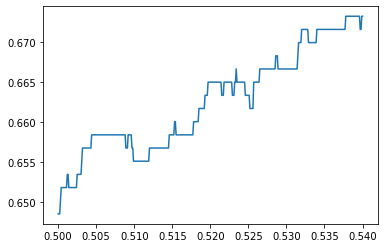

In [23]:
sns.lineplot(x=thres, y=fs)

In [24]:
np.argmax(fs)

378

In [25]:
b = thres[394]

In [26]:
y_pred = (y_prob>b)*1
print(accuracy_score(y_test, y_pred))

0.6732673267326733


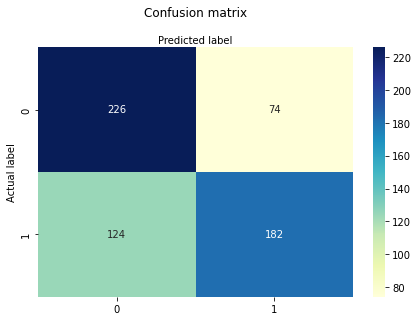

In [27]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0, 1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()